# Overlap of krill fishing and the krill-carbon zone typology
- Catch distribution spatio-temporal
- Harvesting distribution in each category
- Number of krill caught in each category
- Map the overlap

In [56]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [57]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')
#os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

# Load data

In [58]:
zones = pd.read_csv('./output_results/zones_krill_carbon.csv').dropna(subset=['Zone_type'])
zones #1762  

,latitude,longitude,label_grid,mean_seq_time,Upper_tiertile_seq,krill_adult_log,Upper_tiertile_krill,Zone_type,AREA,MASK,True_area
0,-75,-179,0.0,646.910548,1.0,1.08086,0.0,1.0,1.265922e+10,1.0,1.265922e+10
1,-75,-177,0.0,601.882341,1.0,1.38079,0.0,1.0,1.265922e+10,1.0,1.265922e+10
2,-75,-175,0.0,655.238074,1.0,1.51197,0.0,1.0,1.265922e+10,1.0,1.265922e+10
3,-75,-173,0.0,641.075711,1.0,1.53273,0.0,1.0,1.265922e+10,1.0,1.265922e+10
4,-75,-171,0.0,620.753036,1.0,1.70495,1.0,3.0,1.265922e+10,1.0,1.265922e+10
...,...,...,...,...,...,...,...,...,...,...,...
2642,-47,65,0.0,298.907285,0.0,0.47365,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2643,-47,67,0.0,45.645605,0.0,0.63506,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2644,-47,69,0.0,44.367955,0.0,0.48378,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2645,-47,71,0.0,88.203798,0.0,0.31010,0.0,0.0,3.335547e+10,1.0,3.335547e+10


In [59]:
catch = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_all.nc')
catch = catch.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
# catch = catch.to_dataframe().reset_index().drop(['variable'], axis =1) # 940 rows × 3 columns
# catch = catch.dropna()
# catch.set_index(['latitude', 'longitude'], inplace = True)
catch

<xarray.Dataset>
Dimensions:                  (latitude: 10, longitude: 180, variable: 1)
Coordinates:
  * latitude                 (latitude) int32 -69 -67 -65 -63 ... -55 -53 -51
  * longitude                (longitude) int32 -179 -177 -175 ... 175 177 179
  * variable                 (variable) object 'krill_catch_density_log'
Data variables:
    krill_catch_density_log  (variable, latitude, longitude) float64 ...

In [60]:
# save xarray of the temporal average over the three periods
catch_period1 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_1.nc').rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
catch_period2 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_2.nc').rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })
catch_period3 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_3.nc').rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })

# Catch distribution

In [61]:
# get tiertiles
q1 , q2 = catch['krill_catch_density_log'].quantile([0.33, 0.66])

q1_p1 , q2_p1 = catch_period1['krill_catch_density_log'].quantile([0.33, 0.66])
q1_p2 , q2_p2 = catch_period2['krill_catch_density_log'].quantile([0.33, 0.66])
q1_p3 , q2_p3 = catch_period3['krill_catch_density_log'].quantile([0.33, 0.66])

In [62]:
catch = xr.Dataset.to_array(catch)
catch_period1 = xr.Dataset.to_array(catch_period1)
catch_period2 = xr.Dataset.to_array(catch_period2)
catch_period3 = xr.Dataset.to_array(catch_period3)

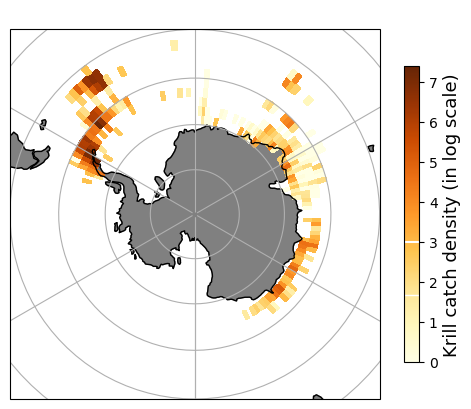

In [63]:
### KRILL CATCH
map_proj = ccrs.SouthPolarStereo()

p = catch.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= "YlOrBr"
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

cb = plt.colorbar(p, label = 'Krill catch density (in log scale)', shrink = 0.8)#, boundaries = np.linspace(0,8,33))

cb.set_label(label='Krill catch density (in log scale)', size=13)
cax = cb.ax
cax.axhline(float(q1), c='w', linewidth = 1)
cax.axhline(float(q2), c='w')


# # cb = plt.colorbar(p, label = 'Krill catch density [Kg/10^4 km²/year] (in log scale)', shrink = 0.8) #, boundaries = np.linspace(0,8,100))
plt.title(' ') # Map of krill catch (average from 1988 to 2023)

# plt.savefig('p_catch.png')
plt.show()

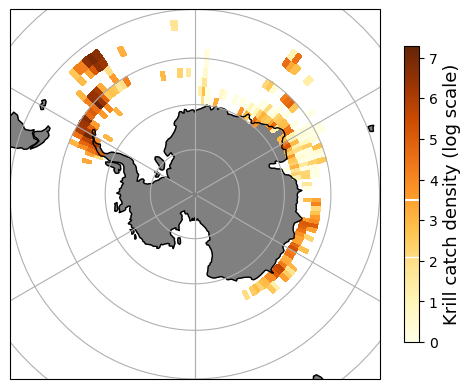

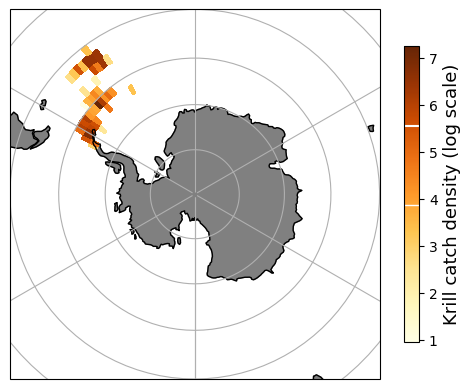

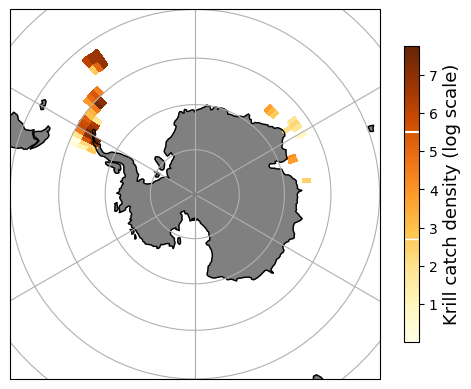

In [64]:
### Maps of krill catch per periods

map_proj = ccrs.SouthPolarStereo()

# From 1988 to 2000 ###############
p1 = catch_period1.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= "YlOrBr"
) 

p1.axes.gridlines()
p1.axes.add_feature(cfeature.LAND, color='grey')
p1.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p1, label = 'Krill catch density (in log scale)', shrink = 0.8)#, boundaries = np.linspace(0,8,33))
cb.set_label(label='Krill catch density (log scale)', size=13)
cax = cb.ax
cax.axhline(2.085731, c='w', linewidth = 1)
cax.axhline(3.506890, c='w')
plt.title('')
#plt.title('Map of krill catch from 1988 to 2000')

# save
# plt.savefig('catch_period1.png' , bbox_inches='tight', dpi=300)

plt.show()


# From 2000 to 2010 ###############
p2 = catch_period2.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= "YlOrBr"
) 

p2.axes.gridlines()
p2.axes.add_feature(cfeature.LAND, color='grey')
p2.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p2, label = 'Krill catch density (in log scale)', shrink = 0.8)#, boundaries = np.linspace(0,8,33)) # Krill catch density  [Kg/km²/year] (in scale log(x+1))
cb.set_label(label='Krill catch density (log scale)', size=13)
cax = cb.ax
cax.axhline(3.874205, c='w', linewidth = 1)
cax.axhline(5.553015, c='w')
plt.title('')
#plt.title('Map of krill catch from 2000 to 2010')

# save
# plt.savefig('catch_period2.png' , bbox_inches='tight', dpi=300 )

plt.show()

# From 2010 to 2023 #############
p3 = catch_period3.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= "YlOrBr"
)  

p3.axes.gridlines()
p3.axes.add_feature(cfeature.LAND, color='grey')
p3.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p3, label = 'Krill catch density (in log scale)', shrink = 0.8) #, boundaries = np.linspace(0,8,33))
cb.set_label(label='Krill catch density (log scale)', size=13)
cax = cb.ax
cax.axhline(2.714316, c='w', linewidth = 1)
cax.axhline(5.499477, c='w')
plt.title('')
# plt.title('Map of krill catch from 2010 to 2023')

# save
# plt.savefig('catch_period3.png', bbox_inches='tight', dpi=300)

plt.show()

# Maps the overlap between the Zones types and fishing grounds

In [65]:
# load the Zones types as xarray
zones_array = xr.open_dataset('./output_results/zones_krill_carbon.nc').to_array()
zones_array

<xarray.DataArray (variable: 1, latitude: 15, longitude: 180)>
array([[[[ 1.,  1.,  1., ...,  2.,  3., nan],
         [ 1.,  1.,  3., ...,  3.,  1., nan],
         [ 3.,  1.,  1., ...,  1.,  1., nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * latitude   (latitude) int32 -75 -73 -71 -69 -67 -65 ... -55 -53 -51 -49 -47
  * longitude  (longitude) int32 -179 -177 -175 -173 -171 ... 173 175 177 179
  * variable   (variable) object '__xarray_dataarray_variable__'

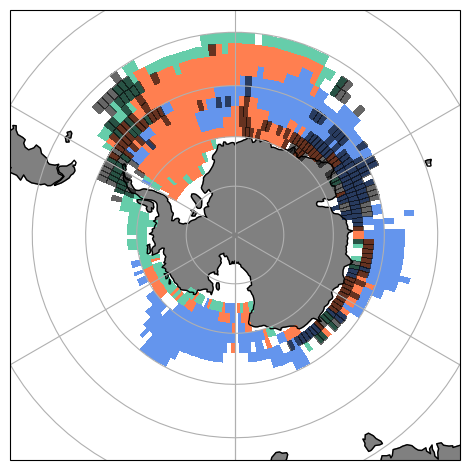

In [66]:
map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    alpha = 1
) 

p2 = catch.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], #  ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
# cb = plt.colorbar(p2, label = 'Fishing density', shrink = 0.8)
# plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishing.png', bbox_inches='tight', dpi=300)

plt.show(p2)

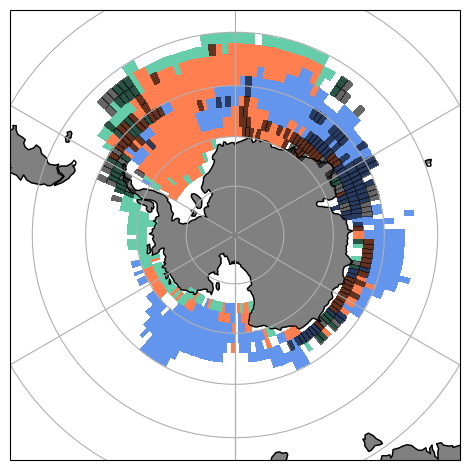

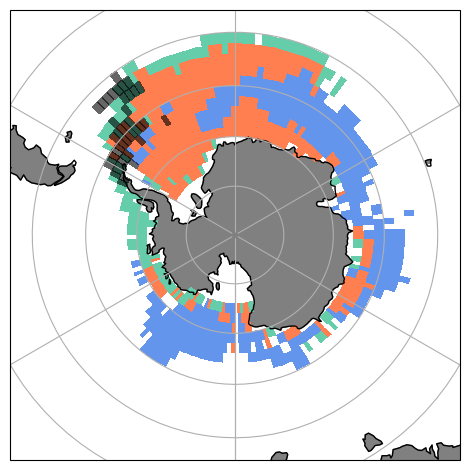

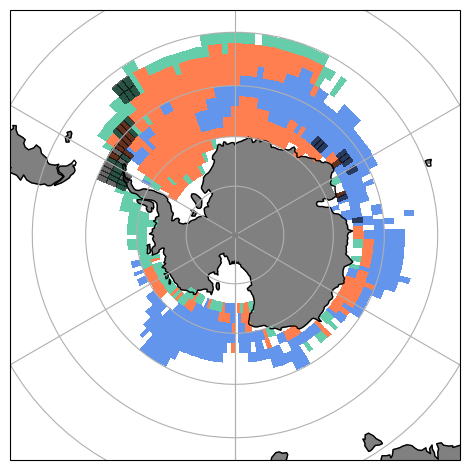

In [67]:
# Map Period 1 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period1.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP1.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# MMap Period 2 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period2.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP2.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# Map Period 3 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period3.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP3.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# Fishing in the different zone types

In [68]:
catch_df = catch.sel(variable='krill_catch_density_log').to_dataframe(name='krill_catch_density_log').drop(['variable'], axis = 1).dropna().reset_index()
catch_df

,latitude,longitude,krill_catch_density_log
0,-69,5,1.420883
1,-69,7,0.001813
2,-69,9,0.001086
3,-69,13,2.759430
4,-69,29,3.221415
...,...,...,...
222,-53,-35,6.628269
223,-53,-7,1.298297
224,-53,35,0.678965
225,-53,37,4.051270


In [69]:
zones_catch = pd.merge(zones, catch_df, how='left').set_index(['latitude', 'longitude'])
zones_catch['krill_catch_density_log'] = zones_catch['krill_catch_density_log'].fillna(0)
zones_catch

label_grid  mean_seq_time  Upper_tiertile_seq  \
latitude longitude                                                  
-75      -179              0.0     646.910548                 1.0   
         -177              0.0     601.882341                 1.0   
         -175              0.0     655.238074                 1.0   
         -173              0.0     641.075711                 1.0   
         -171              0.0     620.753036                 1.0   
...                        ...            ...                 ...   
-47       65               0.0     298.907285                 0.0   
          67               0.0      45.645605                 0.0   
          69               0.0      44.367955                 0.0   
          71               0.0      88.203798                 0.0   
          73               0.0     281.247284                 0.0   

                    krill_adult_log  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                     
-75      -179               1.08086                   0.0        1.0   
         -177               1.38079                   0.0        1.0   
         -175               1.51197                   0.0        1.0   
         -173               1.53273                   0.0        1.0   
         -171               1.70495                   1.0        3.0   
...                             ...                   ...        ...   
-47       65                0.47365                   0.0        0.0   
          67                0.63506                   0.0        0.0   
          69                0.48378                   0.0        0.0   
          71                0.31010                   0.0        0.0   
          73                0.05749                   0.0        0.0   

                            AREA  MASK     True_area  krill_catch_density_log  
latitude longitude                                                             
-75      -179       1.265922e+10   1.0  1.265922e+10                      0.0  
         -177       1.265922e+10   1.0  1.265922e+10                      0.0  
         -175       1.265922e+10   1.0  1.265922e+10                      0.0  
         -173       1.265922e+10   1.0  1.265922e+10                      0.0  
         -171       1.265922e+10   1.0  1.265922e+10                      0.0  
...                          ...   ...           ...                      ...  
-47       65        3.335547e+10   1.0  3.335547e+10                      0.0  
          67        3.335547e+10   1.0  3.335547e+10                      0.0  
          69        3.335547e+10   1.0  3.335547e+10                      0.0  
          71        3.335547e+10   1.0  3.335547e+10                      0.0  
          73        3.335547e+10   1.0  3.335547e+10                      0.0  

[1762 rows x 10 columns]

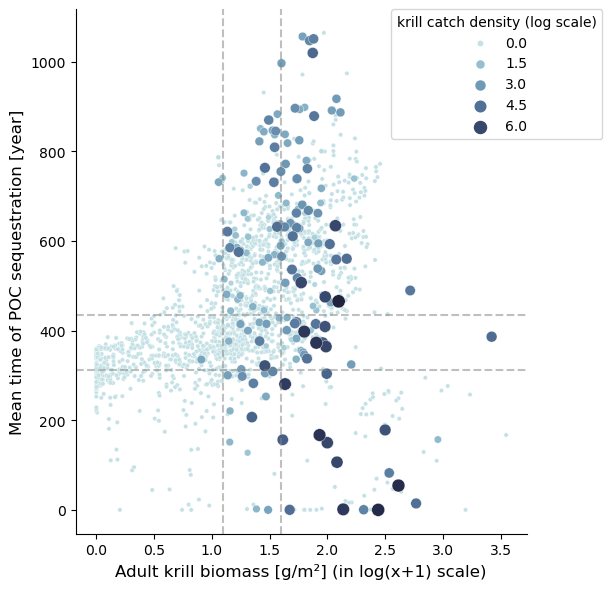

In [70]:
g=sns.relplot(x="krill_adult_log", y="mean_seq_time", 
            data=zones_catch.sort_values(by=['krill_catch_density_log']),
            hue='krill_catch_density_log', 
            size = 'krill_catch_density_log',
            palette = sns.cubehelix_palette(rot=-.2, as_cmap=True),
           sizes = (10,90),
           label='', legend=True,
              height=6, aspect = 0.8)


# # Step 1: Get all legend entries (handles + labels)
# handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]

# # Step 2: Keep only the size legend entries
# # Find where size legend starts (after all Zone_type labels)
# size_start = labels.index("krill_catch_density_log")

# # Step 3: Keep only the size-related entries
# new_handles = handles[size_start + 1:]  # skip the variable name
# new_labels = labels[size_start + 1:]    # skip the variable name


# # Step 4: Remove existing legend, and add a new one with only size info
g._legend.remove()
g.ax.legend(title="krill catch density (log scale)", bbox_to_anchor=(0.7, 1), borderaxespad=0.)


plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')

plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'large')
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 'large')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.text(3.8, 200, '--- :  1/3 quantiles')

plt.tight_layout()
# plt.savefig('./figures/biplot_fishing.png',bbox_inches='tight', dpi=300)

plt.show()

C:\Users\anael\AppData\Local\Temp\ipykernel_69980\2878520780.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]


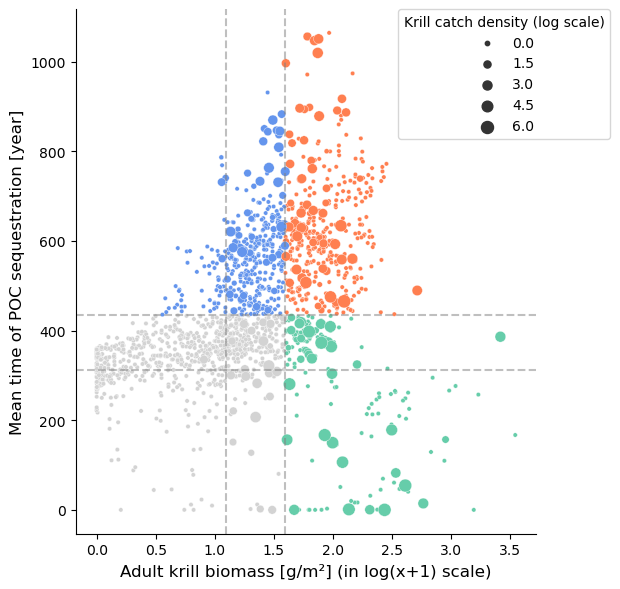

In [71]:
g=sns.relplot(x="krill_adult_log", y="mean_seq_time", 
            data=zones_catch.sort_values(by=['krill_catch_density_log']),
            hue='Zone_type', 
            size = 'krill_catch_density_log',
            #style="krill_catch_density_log",
            palette = ['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'], #sns.cubehelix_palette(rot=-.2, as_cmap=True),
           sizes = (10,90),
           label='krill catch density (log scale)', legend=True,
              height=6, aspect=0.8)


# Step 1: Get all legend entries (handles + labels)
handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]

# Step 2: Keep only the size legend entries
# Find where size legend starts (after all Zone_type labels)
size_start = labels.index("krill_catch_density_log")

# Step 3: Keep only the size-related entries
new_handles = handles[size_start + 1:]  # skip the variable name
new_labels = labels[size_start + 1:]    # skip the variable name


# Step 4: Remove existing legend, and add a new one with only size info
g._legend.remove()
g.ax.legend(new_handles, new_labels, title="Krill catch density (log scale)", bbox_to_anchor=(0.7, 1), borderaxespad=0.)


plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')

plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'large')
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 'large')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.text(3.8, 200, '--- :  1/3 quantiles')

plt.tight_layout()
# plt.savefig('./figures/biplot_fishing_colors.png',bbox_inches='tight', dpi=300)

plt.show()

# Key numbers

- total amount of krill catch
- mean density of krill catch
- amount of krill catch in each zone type
- % of catch taken in each zone type

# Area calculation

- Area of the fishing ground total and for each period
- Area of the overlap of each zone type with fishing

In [72]:
# load area file from OCIM
OCIM = xr.open_dataset('./outputs_formated_data/fseq_OCIM2_48L_interpolated_SO.nc')

# transform area array into a dataframe and crop the file à -45°S
area_df = OCIM[['AREA', 'MASK']].isel(depth=0).to_dataframe().drop(['depth'], axis = 1).reset_index()
area_df = area_df[area_df['latitude'] <=-45].set_index(['latitude', 'longitude'])

## calculate the area of the ocean (remove land) => multiply be the proportion of the ocean in cell (= MASK : 1=ocean, 0=land, or %o each)
area_df['True_area'] = area_df['AREA']*area_df['MASK']
area_df # 3240  rows

AREA      MASK     True_area
latitude longitude                                      
-79      -179.0     9.332850e+09  0.061111  5.703408e+08
         -177.0     9.332850e+09  0.061111  5.703408e+08
         -175.0     9.332850e+09  0.061111  5.703408e+08
         -173.0     9.332850e+09  0.061111  5.703408e+08
         -171.0     9.332850e+09  0.061111  5.703408e+08
...                          ...       ...           ...
-45       171.0     3.458337e+10  0.750000  2.593752e+10
          173.0     3.458337e+10  1.000000  3.458337e+10
          175.0     3.458337e+10  1.000000  3.458337e+10
          177.0     3.458337e+10  1.000000  3.458337e+10
          179.0     3.458337e+10  1.000000  3.458337e+10

[3240 rows x 3 columns]

### Area of fishing grounds

In [73]:
# load the catch data 
catch = pd.read_csv('./outputs_formated_data/Krill_catch_final.csv').set_index(['latitude', 'longitude']).dropna()
catch_p1 = pd.read_csv('./outputs_formated_data/Krill_catch_final_1.csv').set_index(['latitude', 'longitude']).dropna()
catch_p2 = pd.read_csv('./outputs_formated_data/Krill_catch_final_2.csv').set_index(['latitude', 'longitude']).dropna()
catch_p3 = pd.read_csv('./outputs_formated_data/Krill_catch_final_3.csv').set_index(['latitude', 'longitude']).dropna()

In [74]:
#join the areas
catch = catch.join(area_df , how='left')
catch_p1 = catch_p1.join(area_df , how='left')
catch_p2 = catch_p2.join(area_df , how='left')
catch_p3 = catch_p3.join(area_df , how='left')

# sum the area to get the total area fished in eahc period
tot_area_fished  = catch.sum()['True_area']*0.000001 # 4,920,658.035727942 km²
area_fished1 = catch_p1.sum()['True_area']*0.000001 # 4,600,054.005471619 km²
area_fished2 = catch_p2.sum()['True_area']*0.000001 # 1,034,650.1718364782 km²
area_fished3 = catch_p3.sum()['True_area']*0.000001 # 1,012,877.9730397434 km²

In [75]:
print(tot_area_fished, area_fished1, area_fished2, area_fished3)

4920658.035727942 4600054.005471619 1034650.1718364782 1012877.9730397434


### Fishing area in each zone type

How the catch are spread among the 3 identified zone types.

In [76]:
zones

,latitude,longitude,label_grid,mean_seq_time,Upper_tiertile_seq,krill_adult_log,Upper_tiertile_krill,Zone_type,AREA,MASK,True_area
0,-75,-179,0.0,646.910548,1.0,1.08086,0.0,1.0,1.265922e+10,1.0,1.265922e+10
1,-75,-177,0.0,601.882341,1.0,1.38079,0.0,1.0,1.265922e+10,1.0,1.265922e+10
2,-75,-175,0.0,655.238074,1.0,1.51197,0.0,1.0,1.265922e+10,1.0,1.265922e+10
3,-75,-173,0.0,641.075711,1.0,1.53273,0.0,1.0,1.265922e+10,1.0,1.265922e+10
4,-75,-171,0.0,620.753036,1.0,1.70495,1.0,3.0,1.265922e+10,1.0,1.265922e+10
...,...,...,...,...,...,...,...,...,...,...,...
2642,-47,65,0.0,298.907285,0.0,0.47365,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2643,-47,67,0.0,45.645605,0.0,0.63506,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2644,-47,69,0.0,44.367955,0.0,0.48378,0.0,0.0,3.335547e+10,1.0,3.335547e+10
2645,-47,71,0.0,88.203798,0.0,0.31010,0.0,0.0,3.335547e+10,1.0,3.335547e+10


In [77]:
zones_catch = pd.merge(zones[['Zone_type', 'latitude', 'longitude']], catch.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catch = zones_catch.join(other = area_df, how = 'left')

zones_catchp1 = pd.merge(zones[['Zone_type', 'latitude', 'longitude']], catch_p1.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp1 = zones_catchp1.join(other = area_df, how = 'left')

zones_catchp2 = pd.merge(zones[['Zone_type', 'latitude', 'longitude']], catch_p2.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp2 = zones_catchp2.join(other = area_df, how = 'left')

zones_catchp3 = pd.merge(zones[['Zone_type', 'latitude', 'longitude']], catch_p3.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp3 = zones_catchp3.join(other = area_df, how = 'left')

### Area of the fished zones per category

In [78]:
area_allcatch = zones_catch.groupby(['Zone_type'])[['True_area']].sum()
areas_p1 = zones_catchp1.groupby(['Zone_type'])[['True_area']].sum()
areas_p2 = zones_catchp2.groupby(['Zone_type'])[['True_area']].sum()
areas_p3 = zones_catchp3.groupby(['Zone_type'])[['True_area']].sum()

In [79]:
area_allcatch['Period'] = 'all_years'
areas_p1['Period'] = 'period_1'
areas_p2['Period'] = 'period_2'
areas_p3['Period'] = 'period_3'

In [80]:
display(area_allcatch,
areas_p1,
areas_p2,
areas_p3)

,True_area,Period
Zone_type,,
0.0,7.040642e+11,all_years
1.0,1.606998e+12,all_years
2.0,8.908598e+11,all_years
3.0,1.558572e+12,all_years


,True_area,Period
Zone_type,,
0.0,5.994685e+11,period_1
1.0,1.541918e+12,period_1
2.0,8.095308e+11,period_1
3.0,1.488972e+12,period_1


,True_area,Period
Zone_type,,
0.0,1.928981e+11,period_2
2.0,4.847962e+11,period_2
3.0,3.081683e+11,period_2


,True_area,Period
Zone_type,,
0.0,1.170524e+11,period_3
1.0,1.906109e+11,period_3
2.0,4.226303e+11,period_3
3.0,2.309260e+11,period_3


In [81]:
area_allcatch

,True_area,Period
Zone_type,,
0.0,7.040642e+11,all_years
1.0,1.606998e+12,all_years
2.0,8.908598e+11,all_years
3.0,1.558572e+12,all_years


### Amount of krill caught in each category

In [82]:
krill_catch_allcatch = zones_catch.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p1 = zones_catchp1.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p2 = zones_catchp2.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p3 = zones_catchp3.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()

krill_catch_allcatch['tot_catch'] = zones_catch['krill_greenweight_kg'].sum()
krill_catch_p1['tot_catch'] = zones_catchp1['krill_greenweight_kg'].sum()
krill_catch_p2['tot_catch'] = zones_catchp2['krill_greenweight_kg'].sum()
krill_catch_p3['tot_catch'] = zones_catchp3['krill_greenweight_kg'].sum()

krill_catch_allcatch['prop_catch'] = krill_catch_allcatch['krill_greenweight_kg']/krill_catch_allcatch['tot_catch']
krill_catch_p1['prop_catch'] = krill_catch_p1['krill_greenweight_kg']/krill_catch_p1['tot_catch']
krill_catch_p2['prop_catch'] = krill_catch_p2['krill_greenweight_kg']/krill_catch_p2['tot_catch']
krill_catch_p3['prop_catch'] = krill_catch_p3['krill_greenweight_kg']/krill_catch_p3['tot_catch']

In [83]:
krill_catch_allcatch['Period'] = 'all_years'
krill_catch_p1['Period'] = 'period_1'
krill_catch_p2['Period'] = 'period_2'
krill_catch_p3['Period'] = 'period_3'

In [84]:
display(krill_catch_allcatch,
krill_catch_p1,
krill_catch_p2,
krill_catch_p3)

,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,4.607282e+07,7.672510e+09,0.006005,all_years
1.0,1.173237e+07,7.672510e+09,0.001529,all_years
2.0,4.592118e+09,7.672510e+09,0.598516,all_years
3.0,2.364843e+09,7.672510e+09,0.308223,all_years


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,3.228688e+07,2.354474e+09,0.013713,period_1
1.0,1.130342e+07,2.354474e+09,0.004801,period_1
2.0,1.351539e+09,2.354474e+09,0.574030,period_1
3.0,7.843371e+08,2.354474e+09,0.333126,period_1


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,1.230439e+07,1.163511e+09,0.010575,period_2
2.0,6.609130e+08,1.163511e+09,0.568033,period_2
3.0,4.431838e+08,1.163511e+09,0.380902,period_2


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,1.481553e+06,4.154525e+09,0.000357,period_3
1.0,4.289498e+05,4.154525e+09,0.000103,period_3
2.0,2.579666e+09,4.154525e+09,0.620929,period_3
3.0,1.137322e+09,4.154525e+09,0.273755,period_3


## missing catch : cells for which we don't have time seq or krill pop data (so no category assigned) but which exist in the catch record

= 14 cells, representing 160164 km² and 657743.5 tones of krill caught.

In [47]:
missing_catch = zones_catch[zones_catch['Zone_type'].isna()]
print(missing_catch['True_area'].sum()*0.000001)
print(missing_catch['krill_greenweight_kg'].sum()*0.001)

160164.43814199095
657743.5104378496


# plot

tornado chart of the % of cactch taken in each zone type and the overlap area between fishing ground and each zones type for each period > show the evolution

In [85]:
krill_catch_allcatch

,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,4.607282e+07,7.672510e+09,0.006005,all_years
1.0,1.173237e+07,7.672510e+09,0.001529,all_years
2.0,4.592118e+09,7.672510e+09,0.598516,all_years
3.0,2.364843e+09,7.672510e+09,0.308223,all_years


In [86]:
# modify data
area_allcatch.reset_index(inplace=True)
areas_p1.reset_index(inplace=True)
areas_p2.reset_index(inplace=True)
areas_p3.reset_index(inplace=True)

krill_catch_allcatch = krill_catch_allcatch[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p1 = krill_catch_p1[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p2 = krill_catch_p2[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p3 = krill_catch_p3[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()

In [87]:
# comine period in one df
areas_overlap_fising = pd.concat([area_allcatch, areas_p1, areas_p2, areas_p3])
prop_catch = pd.concat([krill_catch_allcatch, krill_catch_p1, krill_catch_p2, krill_catch_p3])

In [88]:
# combine areas overlapped and catch prop based on period and Zone type
data_tornado = areas_overlap_fising.merge(prop_catch, on = ['Zone_type', 'Period'], how='outer')

In [101]:
data_tornado['True_area_norm'] = data_tornado['True_area']*(0.000001*0.000001)  # 10e12 m² = 10e6 km² , a million of km²
data_tornado['krill_greenweight_norm'] = data_tornado['krill_greenweight_kg']*0.001*0.000001 # millions of tons
data_tornado['prop_catch_norm'] = data_tornado['prop_catch']  

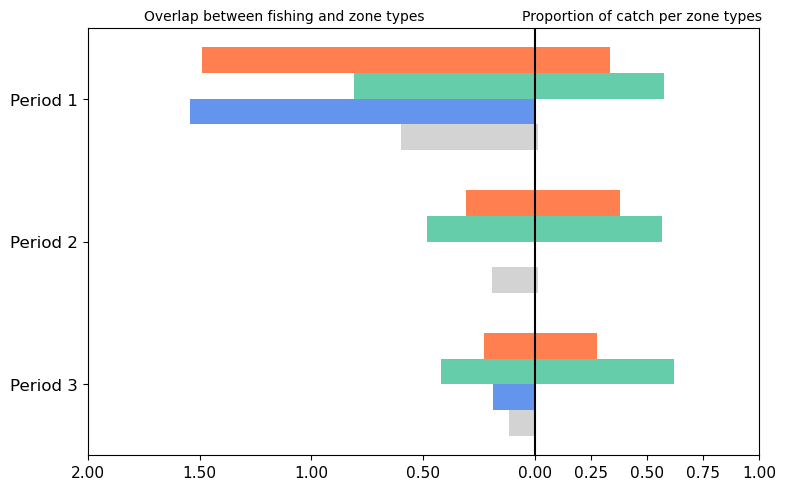

In [94]:
# Couleurs
zone_colors = {
    0: 'lightgrey',
    1: 'cornflowerblue',
    2: 'mediumaquamarine',
    3: 'coral'
}

# Setup du graphique
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.18
periods = ["period_1", "period_2", "period_3"] # + "all_years" ?
zone_types = sorted(data_tornado['Zone_type'].unique(), reverse=True)
y_pos = np.arange(len(periods))

# Boucle par Zone_type
for i, zt in enumerate(zone_types):
    for j, period in enumerate(periods):
        subset = data_tornado[(data_tornado['Zone_type'] == zt) & (data_tornado['Period'] == period)]
        if subset.empty:
            continue

        # Index vertical ajusté par zone
        y = j + (i - 1.5) * bar_width

        # Gauche : True_area (négatif pour barre à gauche, mais valeur positive en label)
        ax.barh(y, -subset['True_area_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

        # Droite : prop_catch
        ax.barh(y, subset['prop_catch_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

# Axe central
ax.axvline(0, color='black')

# Y ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(["Period 1", "Period 2", "Period 3"], fontsize=12)
ax.invert_yaxis()

# Convert x-tick labels to absolute values
x_ticks = np.array([-2 , -1.5, -1 , -0.5,  0 , 0.25,  0.5, 0.75, 1. ]) #ax.get_xticks()
ax.set_xticks(x_ticks)  # Explicitly set the ticks
ax.set_xticklabels([f"{abs(x):.2f}" for x in x_ticks], fontsize=11)

plt.text(-1.75, -0.55, 'Overlap between fishing and zone types', fontsize=10)
plt.text(-0.06, -0.55, 'Proportion of catch per zone types', fontsize=10)

# Légende
# from matplotlib.patches import Patch
# legend_patches = [Patch(color=zone_colors[z], label=f'Zone type {int(z)}') for z in zone_types]
# ax.legend(handles=legend_patches, loc='lower left', fontsize=14)

plt.tight_layout()


# plt.savefig('./figures/tornadoplot_fishing.png',bbox_inches='tight', dpi=300)

plt.show()

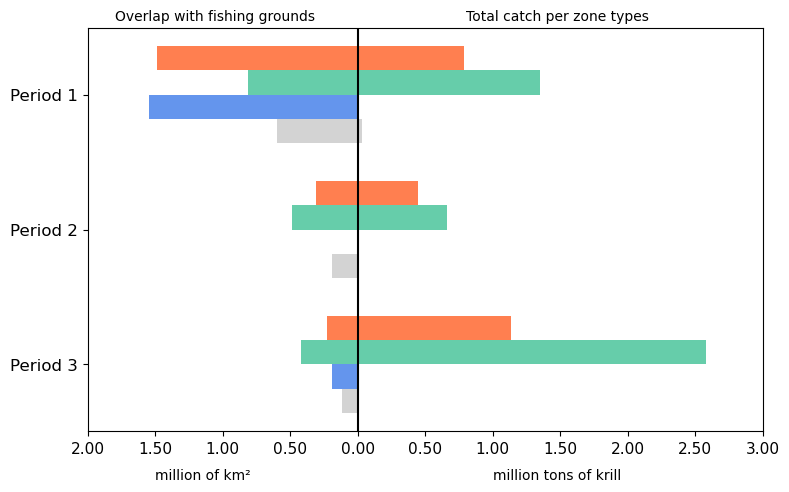

In [122]:
# Couleurs
zone_colors = {
    0: 'lightgrey',
    1: 'cornflowerblue',
    2: 'mediumaquamarine',
    3: 'coral'
}

# Setup du graphique
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.18
periods = ["period_1", "period_2", "period_3"] # + "all_years" ?
zone_types = sorted(data_tornado['Zone_type'].unique(), reverse=True)
y_pos = np.arange(len(periods))

# Boucle par Zone_type
for i, zt in enumerate(zone_types):
    for j, period in enumerate(periods):
        subset = data_tornado[(data_tornado['Zone_type'] == zt) & (data_tornado['Period'] == period)]
        if subset.empty:
            continue

        # Index vertical ajusté par zone
        y = j + (i - 1.5) * bar_width

        # Gauche : True_area (négatif pour barre à gauche, mais valeur positive en label)
        ax.barh(y, -subset['True_area_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

        # Droite : prop_catch
        ax.barh(y, subset['krill_greenweight_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

# Axe central
ax.axvline(0, color='black')

# Y ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(["Period 1", "Period 2", "Period 3"], fontsize=12)
ax.invert_yaxis()

# Convert x-tick labels to absolute values
x_ticks = np.array([-2 , -1.5, -1 , -0.5,  0 , 0.5, 1. , 1.5, 2, 2.5, 3]) #ax.get_xticks()
ax.set_xticks(x_ticks)  # Explicitly set the ticks
ax.set_xticklabels([f"{abs(x):.2f}" for x in x_ticks], fontsize=11)

plt.text(-1.8, -0.55, 'Overlap with fishing grounds ', fontsize=10)
plt.text(0.8, -0.55, 'Total catch per zone types ', fontsize=10)

plt.text(-1.5, 2.85, 'million of km²', fontsize=10)
plt.text(1, 2.85, 'million tons of krill', fontsize=10)

# Légende
# from matplotlib.patches import Patch
# legend_patches = [Patch(color=zone_colors[z], label=f'Zone type {int(z)}') for z in zone_types]
# ax.legend(handles=legend_patches, loc='lower left', fontsize=14)

plt.tight_layout()


plt.savefig('./figures/tornadoplot_fishing_totcatch.png',bbox_inches='tight', dpi=300)

plt.show()